# IPL Win Predictor

## Data Gathering

In [260]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
# Reading the datsets
match_df = pd.read_csv("Datasets/matches.csv")
delivery_df = pd.read_csv("Datasets/deliveries.csv")

In [262]:
match_df.shape

(756, 18)

In [263]:
delivery_df.shape

(179078, 21)

In [264]:
# match dataframe
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [168]:
# delivery dataframe
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Data Preprocessing

In [169]:
# Checking the runs c=scored in bth the innnings of each match an storing it in another dataframe
total_score_df = delivery_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()


In [170]:
# we just need the first inning total for our calculation
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [171]:
# Joining the dataframes
merge = match_df.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on= 'match_id')

In [172]:
merge

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [173]:
merge['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [174]:
# Name of the teams fro the datasets that are playing till today
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [175]:
# Changing the name of the playing teams to their current names
merge['team1'] = merge['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge['team2'] = merge['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

merge['team1'] = merge['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge['team2'] = merge['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

merge['team1'] = merge['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
merge['team2'] = merge['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [176]:
# We only need the teams that are playing till current date, so we are dropping others
merge = merge[merge['team1'].isin(teams)]
merge = merge[merge['team2'].isin(teams)]

In [177]:
merge.shape

(641, 20)

In [178]:
# Matches that are affected by DLS method('0' means not affected, '1' means affected)
merge['dl_applied'].value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

In [179]:
# We are keeping only those matches that are not affected by DLS
merge = merge[merge['dl_applied'] == 0]
merge

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Punjab Kings,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [180]:
# Taking only the required columns
merge = merge[['match_id', 'city', 'winner', 'total_runs']]
merge_df = merge.merge(delivery_df, on = 'match_id')

In [181]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [182]:
merge_df = merge_df[merge_df['inning'] == 2]

In [183]:
merge_df.shape

(72413, 24)

In [184]:
# Result declare in form of 0 & 1
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [185]:
# Checking the null values from datset
print(merge_df.isnull().sum())



match_id                0
city                  832
winner                 27
total_runs_x            0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs_y            0
player_dismissed    68860
dismissal_kind      68860
fielder             69855
dtype: int64


In [186]:
# Filling the missing values in the city column with the mode of their records and the winner column with 'No result
merge_df = merge_df.assign(
    city = merge_df['city'].fillna(merge_df['city'].mode()[0]),
    winner = merge_df['winner'].fillna('No Result')
)

In [187]:
# Check Data Types of each column
print(merge_df.dtypes)



match_id             int64
city                object
winner              object
total_runs_x         int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs_y         int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object


In [188]:
print(merge_df.isnull().sum())

match_id                0
city                    0
winner                  0
total_runs_x            0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs_y            0
player_dismissed    68860
dismissal_kind      68860
fielder             69855
dtype: int64


In [189]:
# Check Unique Values in Key Columns
print(merge_df['winner'].unique())
print(merge_df['batting_team'].unique())
print(merge_df['bowling_team'].unique())


['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers' 'No Result'
 'Delhi Capitals']
['Royal Challengers Bangalore' 'Delhi Daredevils' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings' 'Deccan Chargers'
 'Delhi Capitals']
['Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Chennai Super Kings' 'Rajasthan Royals'
 'Deccan Chargers' 'Delhi Capitals']


In [190]:
# Replacing the name of the teams with their current names in the merged dataframe
merge_df['batting_team'] = merge_df['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge_df['winner'] = merge_df['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

merge_df['batting_team'] = merge_df['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge_df['winner'] = merge_df['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')



In [191]:
# After replacing checking Unique Values in Key Columns
print(merge_df['winner'].unique())
print(merge_df['batting_team'].unique())
print(merge_df['bowling_team'].unique())


['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Delhi Capitals'
 'Chennai Super Kings' 'Rajasthan Royals' 'No Result']
['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']
['Sunrisers Hyderabad' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Capitals'
 'Mumbai Indians' 'Chennai Super Kings' 'Rajasthan Royals']


In [192]:
# One record was left in the previous changing i.e. 'Kingx XI Punjab' -> 'Punjab Kings'
merge_df['batting_team'] = merge_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
merge_df['winner'] = merge_df['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')


In [193]:
print(merge_df['batting_team'].unique())

['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Kings XI Punjab' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']


In [194]:
# One of them giving errors due to spacing problems, that's why we used strip()
merge_df['batting_team'] = merge_df['batting_team'].str.strip()


In [195]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')


In [196]:
print(merge_df['batting_team'].unique())

['Royal Challengers Bangalore' 'Delhi Capitals' 'Mumbai Indians'
 'Punjab Kings' 'Kolkata Knight Riders' 'Sunrisers Hyderabad'
 'Rajasthan Royals' 'Chennai Super Kings']


In [197]:
# We take the help of cumulative sum to calculate the total runs ball by ball
merge_df['current_score'] = merge_df.groupby(['match_id'])['total_runs_y'].cumsum()

In [198]:
# Since the target is 1 run more than the actual runs scored in the first innings
merge_df['runs_left'] = (merge_df['total_runs_x'] - merge_df['current_score']) + 1

In [199]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,1,0,1,NaN,NaN,NaN,152,1
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,2,0,2,NaN,NaN,NaN,154,-1
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,1,0,1,SR Watson,run out,KH Pandya,155,-2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,2,0,2,NaN,NaN,NaN,157,-4


In [200]:
print(merge_df['over'].max())
# our innings has 21 overs total (0 to 20), which makes 126 balls (21 × 6).


20


In [201]:
# Calculating balls left after each ball
merge_df['balls_left'] = 126 - (merge_df['over']*6 + merge_df['ball'])

In [202]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [203]:
# Filling the null values in the player dismised column with 0 and calculating the newly addded wickets columm using it
merge_df['player_dismissed'] = merge_df['player_dismissed'].fillna("0")
merge_df['player_dismissed'] = merge_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
merge_df['player_dismissed'] = merge_df['player_dismissed'].astype('int')
wickets = merge_df.groupby('match_id')['player_dismissed'].cumsum()
merge_df['wickets'] = 10 - wickets
merge_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [204]:
# Current run rate(CRR)
merge_df['crr'] = (merge_df['current_score']*6)/(120 - merge_df['balls_left'])

In [205]:
#Required run rate(RRR)
merge_df['rrr'] = (merge_df['runs_left']*6)/merge_df['balls_left']

In [206]:
merge_df['rrr'] = merge_df['rrr'].apply(lambda x: max(x, 0))


In [207]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,207,119,10,6.000000,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,207,118,10,3.000000,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,207,117,10,2.000000,10.615385
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,205,116,10,4.500000,10.603448
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,201,115,10,8.400000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,1,4,5,7.862069,1.500000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-1,3,5,7.897436,0.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-2,2,4,7.881356,0.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-4,1,4,7.915966,0.000000


In [208]:
# Checking after filling the missing values
print(merge_df.isnull().sum())


match_id                0
city                    0
winner                  0
total_runs_x            0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             0
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs_y            0
player_dismissed        0
dismissal_kind      68860
fielder             69855
current_score           0
runs_left               0
balls_left              0
wickets                 0
crr                     0
rrr                     5
dtype: int64


In [209]:
# Deleting the unnecessary columns
merge_df  = merge_df.drop(columns = [ 'dismissal_kind', 'fielder'])

In [210]:
# Applying modified result column-wise to the dataframe
merge_df['result'] = merge_df.apply(result,axis=1)

In [211]:
# Again checking if there are some null values or not
print(merge_df.isnull().sum())

match_id            0
city                0
winner              0
total_runs_x        0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs_y        0
player_dismissed    0
current_score       0
runs_left           0
balls_left          0
wickets             0
crr                 0
rrr                 5
result              0
dtype: int64


In [212]:
# Checking the first 5 rows
print(merge_df.head())


     match_id       city               winner  total_runs_x  inning  \
125         1  Hyderabad  Sunrisers Hyderabad           207       2   
126         1  Hyderabad  Sunrisers Hyderabad           207       2   
127         1  Hyderabad  Sunrisers Hyderabad           207       2   
128         1  Hyderabad  Sunrisers Hyderabad           207       2   
129         1  Hyderabad  Sunrisers Hyderabad           207       2   

                    batting_team         bowling_team  over  ball  \
125  Royal Challengers Bangalore  Sunrisers Hyderabad     1     1   
126  Royal Challengers Bangalore  Sunrisers Hyderabad     1     2   
127  Royal Challengers Bangalore  Sunrisers Hyderabad     1     3   
128  Royal Challengers Bangalore  Sunrisers Hyderabad     1     4   
129  Royal Challengers Bangalore  Sunrisers Hyderabad     1     5   

           batsman  ... extra_runs total_runs_y  player_dismissed  \
125       CH Gayle  ...          0            1                 0   
126  Mandeep Singh  

In [213]:
# Saving the cleaned datset into a new dataset
merge_df.to_csv('Datasets/final_dataset.csv', index=False)


In [214]:
# Creating a new dataframe with all the necessary features extracted from the previous dataframe
final_df = merge_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [215]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.000000,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.000000,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.000000,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,207,4.500000,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,207,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,152,7.862069,1.500000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,152,7.897436,0.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,152,7.881356,0.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,152,7.915966,0.000000,0


In [216]:
# Suffling to check if everything is fine
final_df = final_df.sample(final_df.shape[0])


In [217]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
58697,Delhi Capitals,Kolkata Knight Riders,Kolkata,92,112,10,97,4.500000,4.928571,1
113541,Rajasthan Royals,Royal Challengers Bangalore,Pune,105,52,7,180,6.705882,12.115385,0
84520,Rajasthan Royals,Mumbai Indians,Mumbai,45,24,4,166,7.625000,11.250000,0
86070,Rajasthan Royals,Sunrisers Hyderabad,Delhi,25,17,4,132,6.291262,8.823529,1
72718,Mumbai Indians,Royal Challengers Bangalore,Bangalore,69,39,8,156,6.518519,10.615385,0
...,...,...,...,...,...,...,...,...,...,...
23006,Sunrisers Hyderabad,Chennai Super Kings,Durban,149,110,10,165,10.200000,8.127273,1
107577,Kolkata Knight Riders,Chennai Super Kings,Chennai,81,84,8,134,9.000000,5.785714,0
72024,Delhi Capitals,Chennai Super Kings,Chennai,87,19,0,222,8.079208,27.473684,0
43969,Punjab Kings,Delhi Capitals,Delhi,48,56,9,111,6.000000,5.142857,1


In [218]:
final_df['batting_team'].unique()

array(['Delhi Capitals', 'Rajasthan Royals', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Punjab Kings', 'Sunrisers Hyderabad', 'Chennai Super Kings'],
      dtype=object)

In [219]:
final_df['batting_team'] = final_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')

In [220]:
final_df['bowling_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Punjab Kings',
       'Delhi Capitals', 'Rajasthan Royals', 'Chennai Super Kings'],
      dtype=object)

In [221]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
41739,Royal Challengers Bangalore,Delhi Capitals,Delhi,158,93,9,184,6.0,10.193548,0


# EDA ( Exploratory Data Analysis)


In [222]:
final_df['batting_team'] = final_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
final_df['batting_team'].unique()

array(['Delhi Capitals', 'Rajasthan Royals', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Punjab Kings', 'Sunrisers Hyderabad', 'Chennai Super Kings'],
      dtype=object)

In [223]:
final_df['bowling_team'].unique()


array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Punjab Kings',
       'Delhi Capitals', 'Rajasthan Royals', 'Chennai Super Kings'],
      dtype=object)

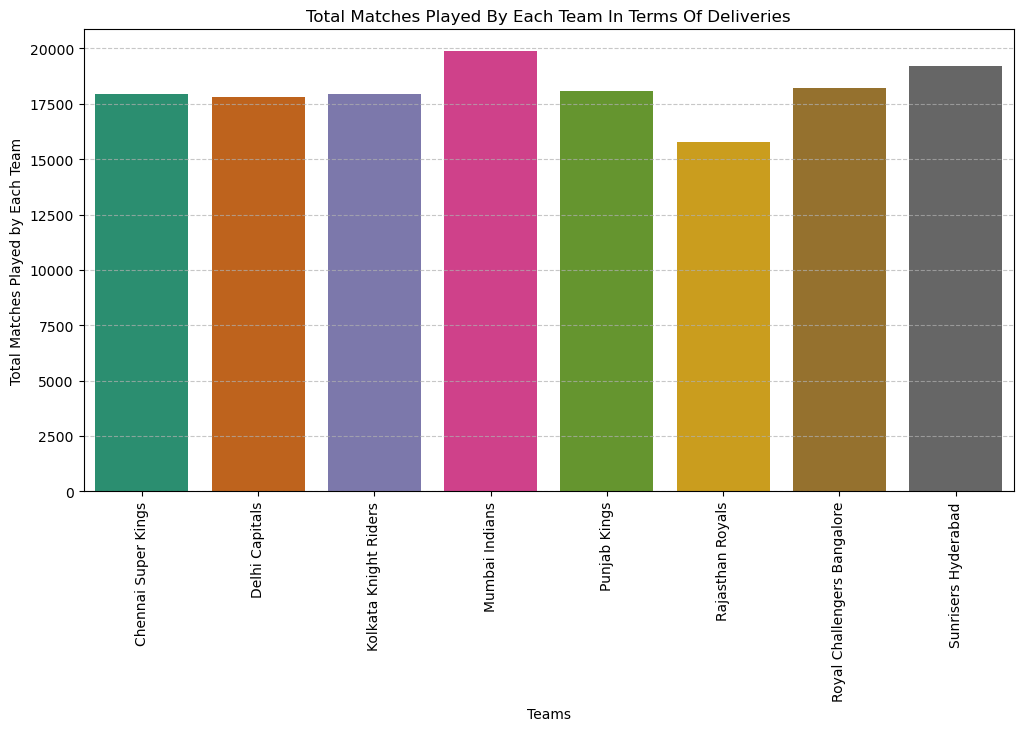

In [224]:
# We are using matplotlib and seaborn library for data visualization with different graphs and charts
# Total Matches Played by Each Team

team_matches = final_df['batting_team'].value_counts() + final_df['bowling_team'].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = team_matches.index, y = team_matches.values, palette = 'Dark2')
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Total Matches Played by Each Team")
plt.title("Total Matches Played By Each Team In Terms Of Deliveries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig("Deliveries.jpg")
plt.show()





#### Mumbai Indians played the highest number of matches and Rajasthan Royals the lowest.

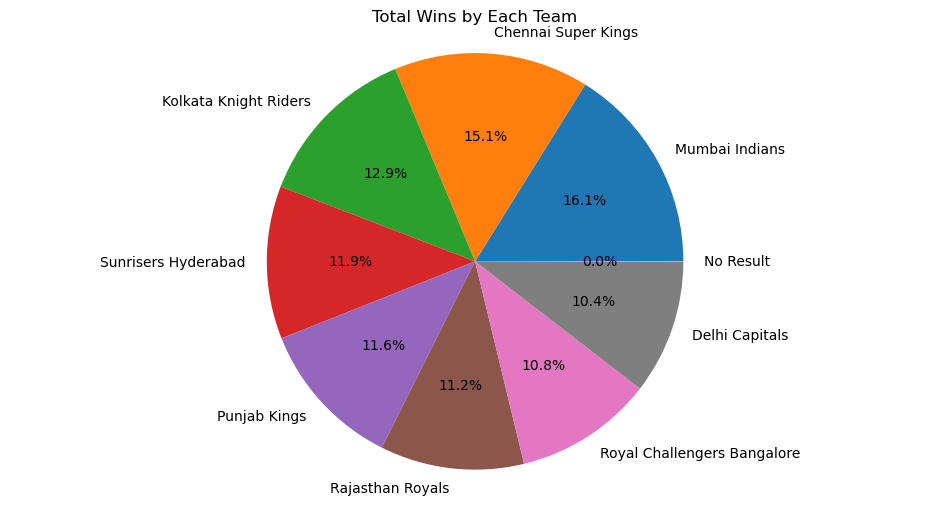

In [225]:
# Total number of wins by each team
winner_counts = merge_df['winner'].value_counts()
plt.figure(figsize = (12,6))
plt.pie(winner_counts, labels = winner_counts.index, autopct='%1.1f%%')
plt.title("Total Wins by Each Team")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.savefig("pie.jpg")
plt.show()



#### We can see that Mumbai Indians has the highest winning percentage and Delhi Capitals has the lowest one(Excluding No Result).

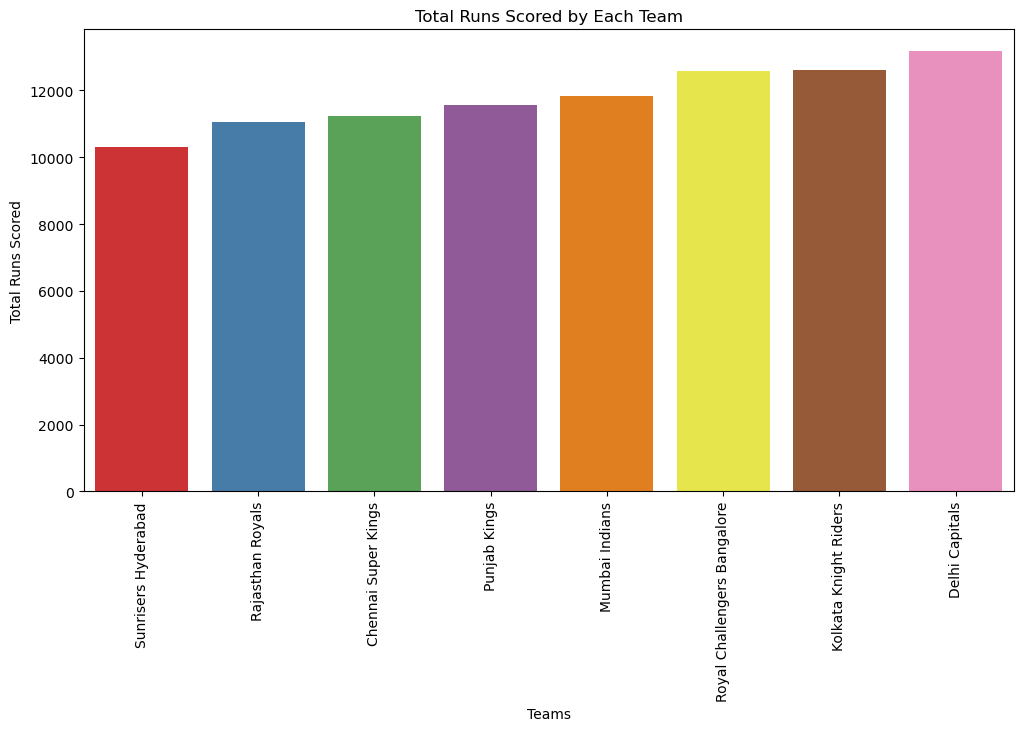

In [226]:
# Total runs scored by each team
team_total_runs = merge_df.groupby('batting_team')['total_runs_y'].sum().sort_values()
plt.figure(figsize=(12,6))
sns.barplot(x = team_total_runs.index, y = team_total_runs.values, palette = 'Set1')
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Total Runs Scored")
plt.title("Total Runs Scored by Each Team")
# plt.savefig("runs.jpg")
plt.show()


#### Delhi Capitals scored the highest number of runs over the years upto 2019 and Sunrisers Hyderabad scored the less amount of runs comapred to other teams.

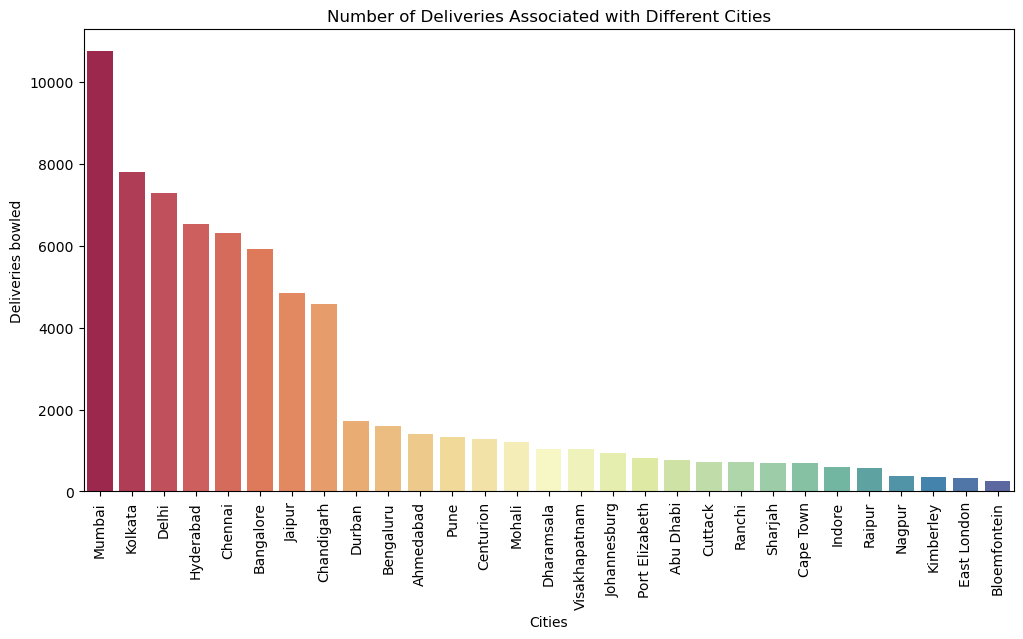

In [227]:
# Matches played in different cities
city_matches = merge_df['city'].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = city_matches.index, y=city_matches.values, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Deliveries bowled")
plt.title("Number of Deliveries Associated with Different Cities")
# plt.savefig("cities.jpg")
plt.show()


#### We can see that the most number of deliveries bowled in the city of Mumbai and the least number of deliveries bowled in Bloemfontein.

In [228]:
# Compute 5-number summary for each numeric column
summary =final_df[['total_runs_x','crr','rrr']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]

print(summary)

     total_runs_x        crr        rrr
min          65.0   0.000000   0.000000
25%         146.0   6.257143   7.257143
50%         165.0   7.480519   9.000000
75%         185.0   8.682353  11.052632
max         250.0  42.000000        inf


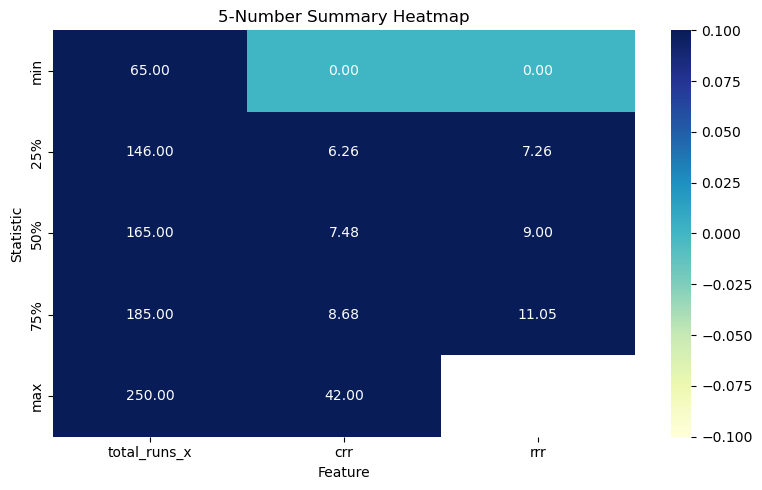

In [229]:
plt.figure(figsize=(8, 5))
sns.heatmap(summary, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('5-Number Summary Heatmap')
plt.ylabel('Statistic')
plt.xlabel('Feature')
plt.tight_layout()
# plt.savefig("5 number summary.jpg")
plt.show()

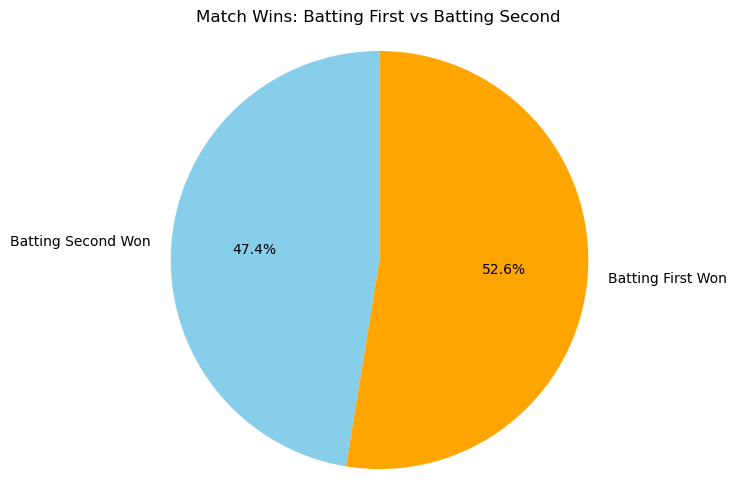

In [230]:
wins = merge_df['result'].value_counts()
# Map results to labels
labels = ['Batting Second Won', 'Batting First Won']
sizes = [wins.get(0, 0), wins.get(1, 0)]

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Match Wins: Batting First vs Batting Second')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
# plt.savefig("batting 1st or 2nd.jpg")
plt.show()

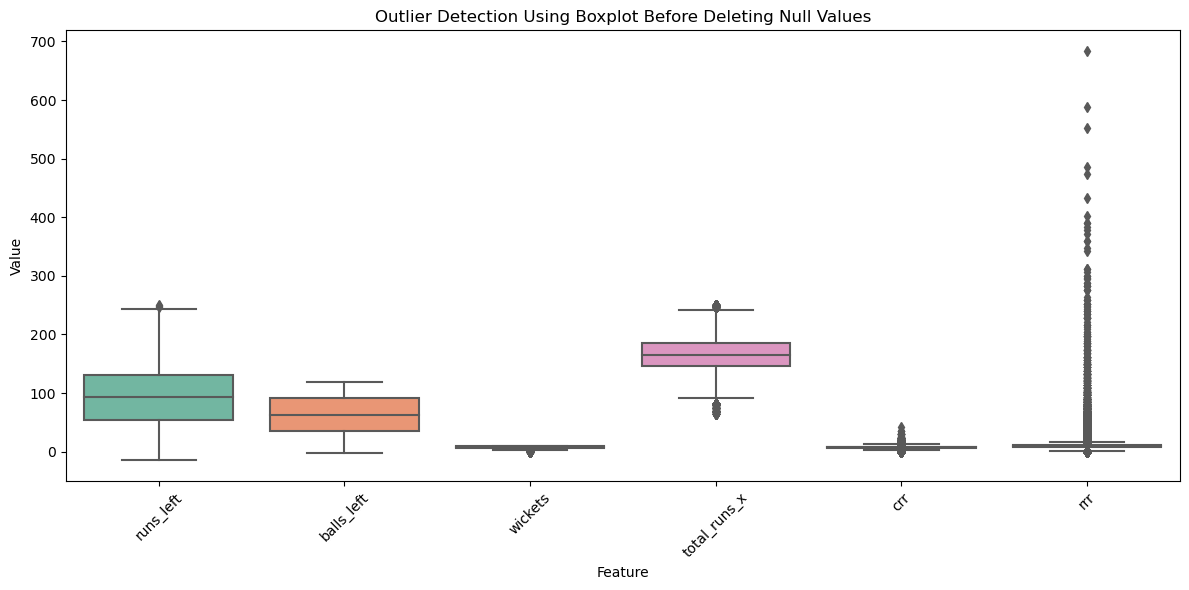

In [231]:
final_df

# Choose relevant numeric columns to inspect for outliers
numeric_cols = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']

# Plot boxplots for each column to show outliers
plt.figure(figsize=(12, 6))
final_df_melted = final_df[numeric_cols].melt(var_name='Feature', value_name='Value')
sns.boxplot(data=final_df_melted, x='Feature', y='Value', palette='Set2')
plt.title('Outlier Detection Using Boxplot Before Deleting Null Values')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("outlier before.jpg")
plt.show()

In [232]:
# If 0 number of balls is left in a match, then it means the winner is already decide. So we drop the records where no balls left in a match
final_df = final_df[final_df['balls_left'] != 0]

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features and target
X = final_df.drop('result', axis=1) # features
y = final_df['result'] # target

# Train/test split (80% training data and 20% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns
categorical_features = ['batting_team', 'bowling_team', 'city']
numeric_features = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']


In [234]:
# Train dataset
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
144386,Sunrisers Hyderabad,Kolkata Knight Riders,Hyderabad,135,105,10,164,12.000000,7.714286
53540,Punjab Kings,Mumbai Indians,Mumbai,77,41,7,159,6.303797,11.268293
124147,Chennai Super Kings,Punjab Kings,Mohali,14,8,5,198,9.910714,10.500000
136929,Royal Challengers Bangalore,Mumbai Indians,Bengaluru,47,18,6,197,8.882353,15.666667
24305,Delhi Capitals,Sunrisers Hyderabad,Centurion,36,22,7,148,6.918367,9.818182
...,...,...,...,...,...,...,...,...,...
14494,Punjab Kings,Chennai Super Kings,Chennai,94,51,8,181,7.652174,11.058824
129950,Punjab Kings,Rajasthan Royals,Indore,58,33,6,160,7.103448,10.545455
10309,Punjab Kings,Delhi Capitals,Chandigarh,23,23,6,158,8.412371,6.000000
149466,Chennai Super Kings,Mumbai Indians,Hyderabad,140,107,10,152,6.000000,7.850467


In [235]:
# Column transformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), categorical_features),
    ('scaler', StandardScaler(), numeric_features)
])


In [236]:
final_df.dropna(inplace=True)

C:\Users\iconi\AppData\Local\Temp\ipykernel_11256\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


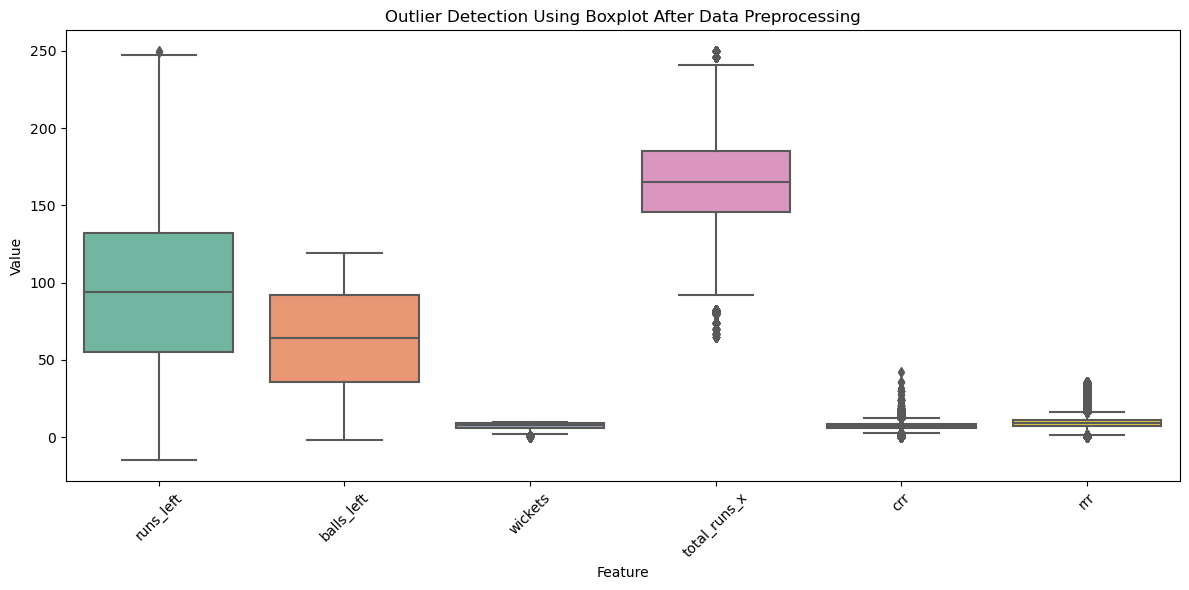

In [237]:
final_df = final_df[final_df['rrr'] <= 36]
# Choose relevant numeric columns to inspect for outliers
numeric_cols = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']

# Plot boxplots for each column to show outliers
plt.figure(figsize=(12, 6))
final_df_melted = final_df[numeric_cols].melt(var_name='Feature', value_name='Value')
sns.boxplot(data=final_df_melted, x='Feature', y='Value', palette='Set2')
plt.title('Outlier Detection Using Boxplot After Data Preprocessing')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("outlier after.jpg")
plt.show()

# Model Training 

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline



### Logistic Regression


In [239]:
# Create a pipeline with logistic regression
log_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

log_pipe.fit(X_train, y_train)

y_pred_log = log_pipe.predict(X_test)


In [240]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

print("Classification Report:\n")
print(classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)

Logistic Regression Accuracy: 0.800138552130239
Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      6788
           1       0.81      0.82      0.81      7647

    accuracy                           0.80     14435
   macro avg       0.80      0.80      0.80     14435
weighted avg       0.80      0.80      0.80     14435

Confusion Matrix:
 [[5266 1522]
 [1363 6284]]


### Random Forest Classifier


In [241]:
random_pipe = Pipeline(steps=[
    ('step1',preprocessor),
    ('step2',RandomForestClassifier())
])

random_pipe.fit(X_train,y_train)
y_pred_random = random_pipe.predict(X_test)


In [242]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random))
print("\nClassification Report:\n", classification_report(y_test, y_pred_random))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_random))


Random Forest Accuracy: 0.9982680983720125

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6788
           1       1.00      1.00      1.00      7647

    accuracy                           1.00     14435
   macro avg       1.00      1.00      1.00     14435
weighted avg       1.00      1.00      1.00     14435


Confusion Matrix:
 [[6780    8]
 [  17 7630]]


### XGBoost Classifier(Extreme Gradient Boosting)

In [243]:
!pip install xgboost


In [244]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_pipe = Pipeline(steps=[
    ('step1', preprocessor), 
    ('step2', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])
xgb_pipe.fit(X_train, y_train)

y_pred_xgb = xgb_pipe.predict(X_test)


C:\Users\iconi\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [12:31:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [245]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9971596813301005

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6788
           1       1.00      1.00      1.00      7647

    accuracy                           1.00     14435
   macro avg       1.00      1.00      1.00     14435
weighted avg       1.00      1.00      1.00     14435


Confusion Matrix:
 [[6772   16]
 [  25 7622]]


### AdaBoost Classifier(Adaptive Boosting)

In [246]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create AdaBoost model with DecisionTreeClassifier as the base estimator
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_pipe = Pipeline(steps=[
    ('step1', preprocessor),        
    ('step2', ada_model)   
])

ada_pipe.fit(X_train, y_train)
y_pred_ada = ada_pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))


Accuracy: 0.7565639071700727

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      6788
           1       0.80      0.73      0.76      7647

    accuracy                           0.76     14435
   macro avg       0.76      0.76      0.76     14435
weighted avg       0.76      0.76      0.76     14435


Confusion Matrix:
 [[5375 1413]
 [2101 5546]]


### SVM(Support Vector Machine)

In [247]:
from sklearn.svm import SVC

# Pipeline
svc_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])

# Train
svc_pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred_svc = svc_pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classifier Report:\n")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Accuracy: 0.9589192933841357
SVC Classifier Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6788
           1       0.95      0.97      0.96      7647

    accuracy                           0.96     14435
   macro avg       0.96      0.96      0.96     14435
weighted avg       0.96      0.96      0.96     14435

Confusion Matrix:
 [[6439  349]
 [ 244 7403]]


# Performance Evaluation

## Precision, Recall & F1-Score
Precision (aka **positive predictive value**) and Recall (aka **sensitivity**) are measurements used both for analysis and calculation of the more holistic F1 score. - Precision is "how useful the results are", and - Recall is "how complete the results are".

    Higher values are better for precision, recall and F1 and they range from 0 to 1.

**F1 is a measure of accuracy that takes into account both false positives and false negatives.**

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$


$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

$$
F_1 = \left( \frac{1}{2} \left( \frac{1}{\text{recall}} + \frac{1}{\text{precision}} \right) \right)^{-1} = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$



In [248]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Accuracy
print(f"Logistic Regression: {accuracy_score(y_test,y_pred_log)}")
print(f"Random Forest Classifier: {accuracy_score(y_test,y_pred_random)}")
print(f"AdaBoost Claasifer: {accuracy_score(y_test,y_pred_ada)}")
print(f"XGBoost Classifer: {accuracy_score(y_test,y_pred_xgb)}")
print(f"Support Vector Machine: {accuracy_score(y_test,y_pred_svc)}")

Logistic Regression: 0.800138552130239
Random Forest Classifier: 0.9982680983720125
AdaBoost Claasifer: 0.7565639071700727
XGBoost Classifer: 0.9971596813301005
Support Vector Machine: 0.9589192933841357


In [249]:
# Precision
print(f"Logistic Regression: {precision_score(y_test, y_pred_log)}")
print(f"Random Forest Classifer: {precision_score(y_test, y_pred_random)}")
print(f"AdaBoost Classifier: {precision_score(y_test, y_pred_ada)}")
print(f"XGBoost Classifier: {precision_score(y_test, y_pred_xgb)}")
print(f"Support Vector Machine: {precision_score(y_test, y_pred_svc)}")


Logistic Regression: 0.8050217781193953
Random Forest Classifer: 0.9989526053940823
AdaBoost Classifier: 0.7969535852852422
XGBoost Classifier: 0.9979052107881644
Support Vector Machine: 0.9549793601651186


In [250]:
# Recall
print(f"Logistic Regression: {recall_score(y_test, y_pred_log)}")
print(f"Random Forest Classifer: {recall_score(y_test, y_pred_random)}")
print(f"AdaBoost Classifier: {recall_score(y_test, y_pred_ada)}")
print(f"XGBoost Classifier: {recall_score(y_test, y_pred_xgb)}")
print(f"Support Vector Machine: {recall_score(y_test, y_pred_svc)}")

Logistic Regression: 0.821760167385903
Random Forest Classifer: 0.9977769059761998
AdaBoost Classifier: 0.7252517327056361
XGBoost Classifier: 0.9967307440826468
Support Vector Machine: 0.9680920622466327


In [251]:
# F1 Score
print(f"Logistic Regression: {f1_score(y_test, y_pred_log)}")
print(f"Random Forest Classifer: {f1_score(y_test, y_pred_random)}")
print(f"AdaBoost Classifier: {f1_score(y_test, y_pred_ada)}")
print(f"XGBoost Classifier: {f1_score(y_test, y_pred_xgb)}")
print(f"Support Vector Machine: {f1_score(y_test, y_pred_svc)}")

Logistic Regression: 0.8133048598977545
Random Forest Classifer: 0.9983644095518482
AdaBoost Classifier: 0.7594139394769273
XGBoost Classifier: 0.9973176316650311
Support Vector Machine: 0.9614910059094747


In [252]:
# Confusion Matrix
log_reg_cm = confusion_matrix(y_test, y_pred_log)
print(f"Logistic Regression:\n {confusion_matrix(y_test, y_pred_log)}")

random_cm = confusion_matrix(y_test, y_pred_random)
print(f"Random Forest Classifer:\n {confusion_matrix(y_test, y_pred_random)}")

ada_cm = confusion_matrix(y_test, y_pred_ada)
print(f"AdaBoost Classifier:\n {confusion_matrix(y_test, y_pred_ada)}")

xgb_cm = confusion_matrix(y_test, y_pred_xgb)
print(f"XGBoost Classifier:\n {confusion_matrix(y_test, y_pred_xgb)}")

svc_cm = confusion_matrix(y_test, y_pred_svc)
print(f"Support Vector Machine:\n {confusion_matrix(y_test, y_pred_svc)}")

Logistic Regression:
 [[5266 1522]
 [1363 6284]]
Random Forest Classifer:
 [[6780    8]
 [  17 7630]]
AdaBoost Classifier:
 [[5375 1413]
 [2101 5546]]
XGBoost Classifier:
 [[6772   16]
 [  25 7622]]
Support Vector Machine:
 [[6439  349]
 [ 244 7403]]


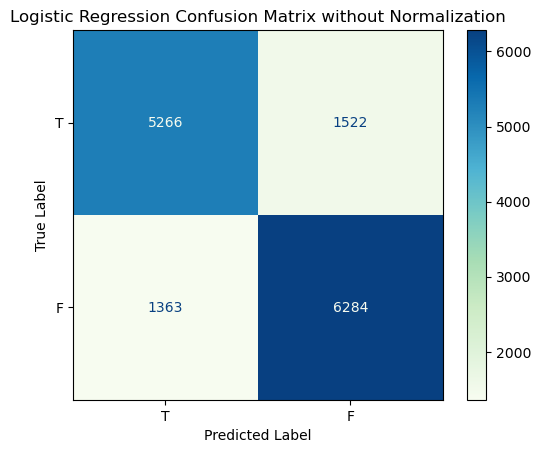

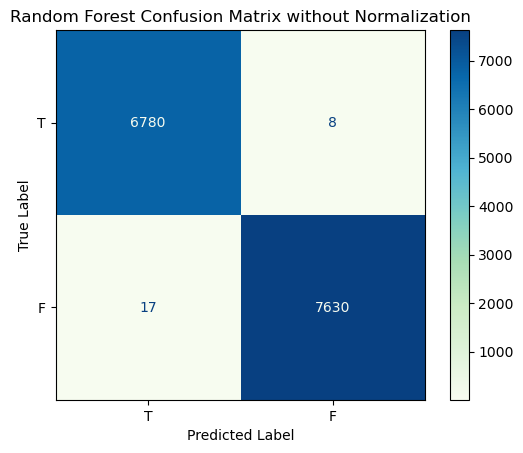

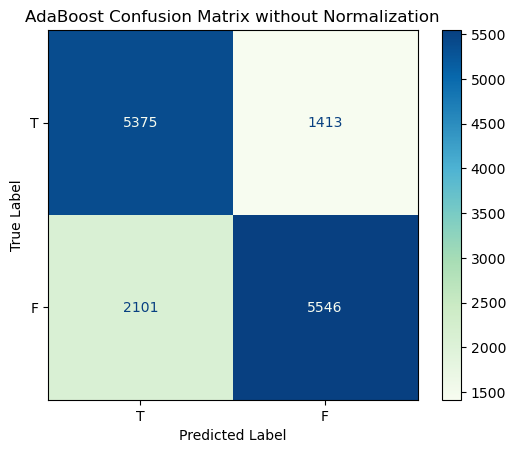

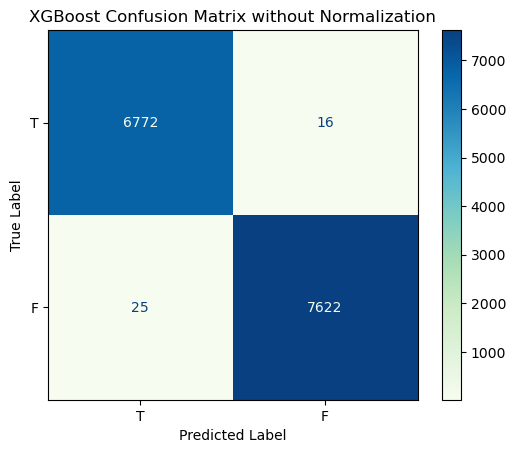

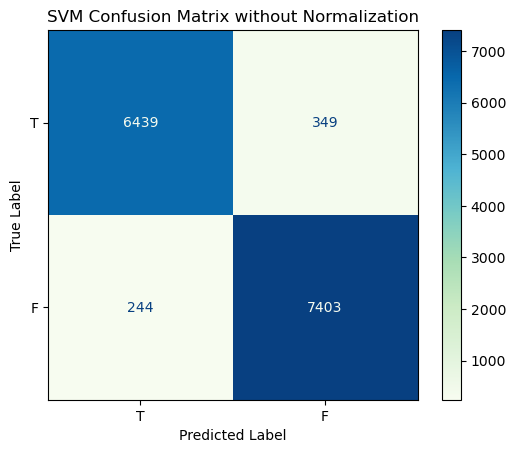

In [253]:
# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp1 = ConfusionMatrixDisplay(
    confusion_matrix=log_reg_cm,
    display_labels= ['T', 'F']
)
disp1.plot(cmap='GnBu')
plt.title("Logistic Regression Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("logreg cm.jpg")
plt.show()

disp2 = ConfusionMatrixDisplay(
    confusion_matrix=random_cm,
    display_labels= ['T', 'F']
)
disp2.plot(cmap='GnBu')
plt.title("Random Forest Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("random cm.jpg")
plt.show()

disp3 = ConfusionMatrixDisplay(
    confusion_matrix=ada_cm,
    display_labels= ['T', 'F']
)
disp3.plot(cmap='GnBu')
plt.title("AdaBoost Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("ada cm.jpg")
plt.show()

disp4 = ConfusionMatrixDisplay(
    confusion_matrix=xgb_cm,
    display_labels= ['T', 'F']
)
disp4.plot(cmap='GnBu')
plt.title("XGBoost Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("xgb cm.jpg")
plt.show()

disp5 = ConfusionMatrixDisplay(
    confusion_matrix=svc_cm,
    display_labels= ['T', 'F']
)
disp5.plot(cmap='GnBu')
plt.title("SVM Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("svm cm.jpg")
plt.show()

Normalized Confusion Matrix
[[0.7758 0.2242]
 [0.1782 0.8218]]


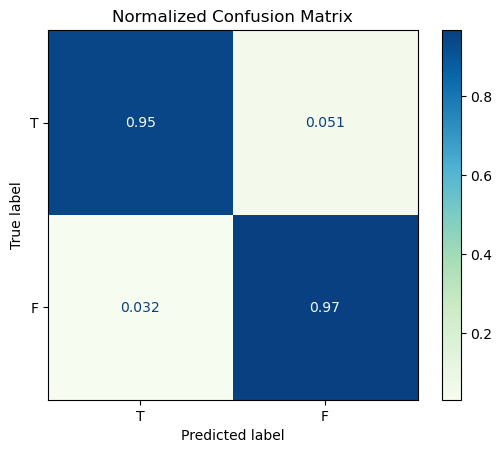

In [254]:
# Normalization of Confusion Matrix (We only show here one normalised confusion matrix, similarly we can show the normalised confusion matrix for other four models)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix")
np.set_printoptions(precision=4, suppress=True)
print(cm_normalized)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, normalize='true', display_labels=["T", "F"], cmap='GnBu')
disp.ax_.set_title("Normalized Confusion Matrix")
plt.show()

### Area Under the Curve (AUC)
Area Under the Curve (AUC) is closely related to the (Receiver Operating Characteristic) ROC chart. Both will make use of the data.

In [255]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_random)

# Compute Area Under the Curve (AUC) using the trapezoidal rule (we only show for SVM model, we can also show for the other four models in the similar way)
roc_auc = auc(fpr, tpr)
print(f"Y: {y_test}")
print(f"Y_HAT: {y_pred_random}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: 64414     0
16756     0
88027     1
120967    1
52065     0
         ..
102210    1
53722     0
103094    1
35237     0
8169      1
Name: result, Length: 14435, dtype: int64
Y_HAT: [0 0 1 ... 1 0 1]
FPR: [0.     0.0012 1.    ]
TPR: [0.     0.9978 1.    ]
Optimal threshold index: 1
Optimal threshold value: 1.0
AUC: 0.9982991777965855


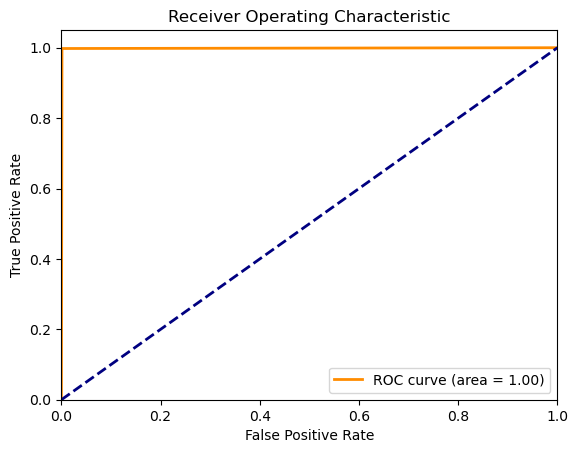

In [256]:
# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
# plt.savefig("svc roc.jpg")
plt.show()

In general, a ROC chart with a large amount of space below the curve is desirable. Below 0.5 is a very bad model and the closer to 1.0 you can go (without overfitting) the better.

In [257]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
64414,Mumbai Indians,Delhi Capitals,Delhi,208,117,9,207,0.000000,10.666667
16756,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,159,96,9,178,5.000000,9.937500
88027,Delhi Capitals,Kolkata Knight Riders,Mumbai,0,3,4,166,8.564103,0.000000
120967,Royal Challengers Bangalore,Delhi Capitals,Raipur,33,35,7,138,7.482353,5.657143
52065,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,99,58,6,172,7.161290,10.241379
...,...,...,...,...,...,...,...,...,...
102210,Rajasthan Royals,Delhi Capitals,Delhi,4,2,3,184,9.203390,12.000000
53722,Sunrisers Hyderabad,Kolkata Knight Riders,Hyderabad,157,105,10,169,5.200000,8.971429
103094,Kolkata Knight Riders,Chennai Super Kings,Kolkata,129,87,9,165,6.727273,8.896552
35237,Kolkata Knight Riders,Chennai Super Kings,Kolkata,98,61,5,164,6.813559,9.639344


In [258]:
print(f"Logistic regression testing: {log_pipe.predict_proba(X_test)[10]}")
print(f"Random Forest testing: {random_pipe.predict_proba(X_test)[10]}")
print(f"AdaBoost testing: {ada_pipe.predict_proba(X_test)[10]}")
print(f"XGBoost testing: {xgb_pipe.predict_proba(X_test)[10]}")
print(f"SVM testing: {svc_pipe.predict_proba(X_test)[10]}")


Logistic regression testing: [0.0603 0.9397]
Random Forest testing: [0.97 0.03]
AdaBoost testing: [0.2879 0.7121]
XGBoost testing: [0.994 0.006]
SVM testing: [0.9798 0.0202]


In [259]:
import pickle
pickle.dump(log_pipe,open('log_pipe.pkl','wb'))
pickle.dump(random_pipe,open('random_pipe.pkl','wb'))
pickle.dump(ada_pipe,open('ada_pipe.pkl','wb'))
pickle.dump(xgb_pipe,open('xgb_pipe.pkl','wb'))
pickle.dump(svc_pipe,open('pipe.pkl','wb'))